# Triton work for "NL I09" and without FLUETEMP', 'INLTTEMP, tanktemp
### target is CHE_FIGN;  is continuos
### is target categorical or conitunuous variable ?????
### what factor affecting target to change
### which object column we need to convert to numbers
### which column we can drop from experience from object or numbers
### we can drop time column
### we have to drop or impute (replace missing values with mean or median) or normalize same as we are doing in our dashboard
### we can drop may be only 5% to 10% data if data set is very large

In [1]:
# Required Imports 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating dataframe df1 of "NL I09"
df1 = pd.read_csv("./clean-anes/NL I09.csv")

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,8,9,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#readong first 5 rows of "NL I09"
df1.head()

,Date/Time,WHTRDIFF,FLUETEMP,INLTTEMP,S1_AIRFL,S2_INPRS,S3_EXPRS,CHE_SIGN,ALARM_03,ALARM_04,...,AND2POWR,AND1CURR,AND2CURR,VLVSTATE,ALARM_01,ALARM_02,ECOSTATE,GASVALVE,OCCUPIED,FLOW_GPM
0,2021-04-11 16:37:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-11 16:37:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-11 16:38:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-11 16:38:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-11 16:39:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120914 entries, 0 to 1120913
Data columns (total 33 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1120912 non-null  object 
 1   WHTRDIFF   340781 non-null   float64
 2   FLUETEMP   386143 non-null   object 
 3   INLTTEMP   386143 non-null   object 
 4   S1_AIRFL   386143 non-null   object 
 5   S2_INPRS   386143 non-null   object 
 6   S3_EXPRS   386143 non-null   object 
 7   CHE_SIGN   386143 non-null   float64
 8   ALARM_03   386143 non-null   object 
 9   ALARM_04   386143 non-null   object 
 10  AND3POWR   386143 non-null   float64
 11  AND3CURR   223838 non-null   float64
 12  C_HEALTH   223838 non-null   float64
 13  T_HEALTH   223838 non-null   float64
 14  MODEL_ID   223838 non-null   float64
 15  WHTRSETP   223838 non-null   float64
 16  Station    1120914 non-null  object 
 17  CHE_FIGN   340040 non-null   float64
 18  CHE_BMIN   340040 non-null   float64
 19  

In [5]:
df1.columns

Index(['Date/Time', 'WHTRDIFF', 'FLUETEMP', 'INLTTEMP', 'S1_AIRFL', 'S2_INPRS',
       'S3_EXPRS', 'CHE_SIGN', 'ALARM_03', 'ALARM_04', 'AND3POWR', 'AND3CURR',
       'C_HEALTH', 'T_HEALTH', 'MODEL_ID', 'WHTRSETP', 'Station', 'CHE_FIGN',
       'CHE_BMIN', 'TANKTEMP', 'FLAMECUR', 'FANSPEED', 'AND1POWR', 'AND2POWR',
       'AND1CURR', 'AND2CURR', 'VLVSTATE', 'ALARM_01', 'ALARM_02', 'ECOSTATE',
       'GASVALVE', 'OCCUPIED', 'FLOW_GPM'],
      dtype='object')

In [6]:
df1['Date/Time'].head()

0    2021-04-11 16:37:21
1    2021-04-11 16:37:51
2    2021-04-11 16:38:21
3    2021-04-11 16:38:51
4    2021-04-11 16:39:21
Name: Date/Time, dtype: object

In [7]:
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

In [8]:
df1['Date/Time'].head()

0   2021-04-11 16:37:21
1   2021-04-11 16:37:51
2   2021-04-11 16:38:21
3   2021-04-11 16:38:51
4   2021-04-11 16:39:21
Name: Date/Time, dtype: datetime64[ns]

In [9]:
df1.head()

,Date/Time,WHTRDIFF,FLUETEMP,INLTTEMP,S1_AIRFL,S2_INPRS,S3_EXPRS,CHE_SIGN,ALARM_03,ALARM_04,...,AND2POWR,AND1CURR,AND2CURR,VLVSTATE,ALARM_01,ALARM_02,ECOSTATE,GASVALVE,OCCUPIED,FLOW_GPM
0,2021-04-11 16:37:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-11 16:37:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-11 16:38:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-11 16:38:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-11 16:39:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#These are first set of object columns to work on
#'FLUETEMP', 'INLTTEMP', 'S1_AIRFL', 'S2_INPRS',
 #      'S3_EXPRS'

In [11]:
# i need to conver "FLUETEMP" to float and is important

# and similarly look at 'INLTTEMP'

In [12]:
df1['FLUETEMP'].value_counts()

                                                    1540
97.3                                                1388
100.3                                               1355
96.1                                                1339
104.1                                               1326
                                                    ... 
149.3                                                  1
76.9                                                   1
76.5                                                   1
150.0                                                  1
0.0                                                    1
Name: FLUETEMP, Length: 1312, dtype: int64

In [13]:
df1['FLUETEMP'].unique()

array([nan, 119.8, 120.6, ..., '125.5', '126.6', '125.4'], dtype=object)

In [14]:
#df1['FLUETEMP'] = df1['FLUETEMP'].rolling(window=5).mean()

In [15]:
df1['INLTTEMP'].value_counts()

81.4     3084
80.9     2830
81.9     2784
81.6     2648
81.3     2638
         ... 
142.5       1
140.3       1
140.8       1
141.1       1
0.0         1
Name: INLTTEMP, Length: 1349, dtype: int64

In [16]:
df1["S1_AIRFL"].value_counts()

Open      122124
Closed    101435
1.0        90587
0.0        60382
1           5991
0           4078
10.0         960
11.0         274
9.0          170
12.0         130
8.0            6
64             5
64.0           1
Name: S1_AIRFL, dtype: int64

In [17]:
df1["S1_AIRFL"].unique()

array([nan, 'Closed', 'Open', '1', '0', '64', 1.0, 0.0, 64.0, 12.0, 11.0,
       10.0, 9.0, 8.0], dtype=object)

In [18]:
(122124+90587+5991,
101435+4078+60382)

(218702, 165895)

In [19]:
# to change labels of "S1_AIRFL"

S1_AIRFL_dict = {
    'nan': 'nan',
    'Closed': 0,
    1.0: 1,
    "1": 1,
    "0": 0,
    0.0: 0,
    'Open': 1
}

df1["S1_AIRFL"] = df1["S1_AIRFL"].map(S1_AIRFL_dict)

In [20]:
df1["S1_AIRFL"].value_counts()

1    218702
0    165895
Name: S1_AIRFL, dtype: int64

In [21]:
df1["S1_AIRFL"].unique()

array([nan, 0, 1], dtype=object)

In [22]:
df1["S1_AIRFL"].dtype

dtype('O')

In [23]:
df1['S2_INPRS'].value_counts()

Closed    223553
0.0       150969
0          10069
12.0        1540
Open           6
70             5
70.0           1
Name: S2_INPRS, dtype: int64

In [24]:
df1['S2_INPRS'].unique()

array([nan, 'Closed', 'Open', '0', '70', 0.0, 70.0, 12.0], dtype=object)

In [25]:
# to change labels of "S2_INPRS"

S2_INPRS_dict = {
    'nan': 'nan',
    'Closed': 0,
    "0": 0,
    0.0: 0,
    'Open': 1
}

df1["S2_INPRS"] = df1["S2_INPRS"].map(S2_INPRS_dict)

In [26]:
df1['S2_INPRS'].value_counts()

0    384591
1         6
Name: S2_INPRS, dtype: int64

In [27]:
df1['S2_INPRS'].unique()

array([nan, 0, 1], dtype=object)

In [28]:
#all closed and so we can drop this column
df1['S3_EXPRS'].value_counts()

Closed    223553
0.0       150969
0          10067
90.7          18
90.9          18
           ...  
109.5          2
110.7          2
97.0           2
116.9          2
64.0           1
Name: S3_EXPRS, Length: 317, dtype: int64

In [29]:
df1['S3_EXPRS'].unique()

array([nan, 'Closed', 'Open', '0', '64', 0.0, 64.0, 114.3, 117.4, 119.4,
       115.2, 109.9, 106.7, 104.1, 102.5, 101.3, 100.1, 99.1, 98.2, 97.4,
       96.6, 96.0, 95.1, 94.3, 93.5, 92.9, 92.2, 91.8, 91.4, 91.0, 90.7,
       90.3, 90.1, 89.6, 81.5, 95.9, 100.7, 104.0, 106.4, 110.1, 112.4,
       114.7, 117.7, 120.4, 123.2, 121.9, 116.1, 110.8, 107.0, 104.5,
       101.1, 99.8, 98.7, 97.8, 96.9, 96.2, 95.6, 95.0, 93.7, 93.3, 92.5,
       91.1, 82.1, 96.7, 100.8, 102.7, 104.2, 105.5, 106.9, 107.7, 110.0,
       112.5, 115.0, 117.0, 113.9, 109.6, 105.7, 103.1, 101.2, 98.4, 97.6,
       96.8, 96.1, 95.4, 94.8, 94.4, 94.0, 93.1, 92.7, 90.9, 90.2, 82.8,
       100.6, 103.9, 106.8, 112.3, 114.6, 117.6, 120.6, 122.9, 121.5,
       115.8, 111.1, 107.2, 104.7, 101.5, 100.4, 99.2, 97.2, 96.4, 94.9,
       94.5, 93.9, 93.4, 92.4, 92.0, 91.7, 91.3, 90.8, 82.7, 110.3, 117.2,
       119.7, 122.3, 119.8, 113.2, 108.9, 105.3, 101.4, 98.8, 97.7, 95.8,
       94.6, 94.1, 92.1, 90.4, 82.4, 99.5, 101.6, 

all closed and so we can drop this column

In [30]:
# Remove column name 'S3_EXPRS'
df1=df1.drop(['S3_EXPRS'], axis = 1)

In [31]:
df1.columns

Index(['Date/Time', 'WHTRDIFF', 'FLUETEMP', 'INLTTEMP', 'S1_AIRFL', 'S2_INPRS',
       'CHE_SIGN', 'ALARM_03', 'ALARM_04', 'AND3POWR', 'AND3CURR', 'C_HEALTH',
       'T_HEALTH', 'MODEL_ID', 'WHTRSETP', 'Station', 'CHE_FIGN', 'CHE_BMIN',
       'TANKTEMP', 'FLAMECUR', 'FANSPEED', 'AND1POWR', 'AND2POWR', 'AND1CURR',
       'AND2CURR', 'VLVSTATE', 'ALARM_01', 'ALARM_02', 'ECOSTATE', 'GASVALVE',
       'OCCUPIED', 'FLOW_GPM'],
      dtype='object')

In [32]:
df1['ALARM_03'].value_counts()

                                                    384591
1                                                      932
0                                                      608
@                                                        4
T115 Combustion Health Degraded: Needs Service           4
@@                                                       2
?€                                                       2
Name: ALARM_03, dtype: int64

In [33]:
df1['ALARM_03'].unique()

array([nan, '                                                ',
       'T115 Combustion Health Degraded: Needs Service  ', '@', '@@',
       '?€', '0', '1'], dtype=object)

In [34]:
# to change labels of "ALARM_03"

ALARM_03_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T115 Combustion Health Degraded: Needs Service  ': 'T115 Combustion Health Degraded: Needs Service',
    'nan': np.nan
}

df1["ALARM_03"] = df1["ALARM_03"].map(ALARM_03_dict)

In [35]:
df1['ALARM_03'].unique()

array([nan, 'no_alarm', 'T115 Combustion Health Degraded: Needs Service'],
      dtype=object)

In [36]:
df1['ALARM_03'].value_counts()

no_alarm                                          384591
T115 Combustion Health Degraded: Needs Service         4
Name: ALARM_03, dtype: int64

In [37]:
df1['ALARM_04'].value_counts()

                                                    384595
0                                                     1540
?€                                                       6
@                                                        2
Name: ALARM_04, dtype: int64

In [38]:
df1['ALARM_04'].unique()

array([nan, '                                                ', '?€', '@',
       '0'], dtype=object)

In [39]:
# to change labels of "ALARM_03"

ALARM_04_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm"
}

df1["ALARM_04"] = df1["ALARM_04"].map(ALARM_04_dict)

In [40]:
df1['ALARM_04'].value_counts()

no_alarm    384595
Name: ALARM_04, dtype: int64

In [41]:
df1['ALARM_04'].unique()

array([nan, 'no_alarm'], dtype=object)

In [ ]:
# all alarms added and be one with T029 is one and rest all zero

In [ ]:
#last set of object columns to deal with
#VLVSTATE', 'ALARM_01', 'ALARM_02', 'ECOSTATE',
 #      'GASVALVE', 'OCCUPIED

In [42]:
df1['VLVSTATE'].value_counts()

2             122235
5             102040
2.0            51764
5.0            31167
10              7769
1.0             6880
3               4803
Post-Purge      3391
1               2363
3.0             1787
7               1665
4               1603
6.0             1272
4.0              486
8                360
6                234
7.0              215
0                  5
Name: VLVSTATE, dtype: int64

In [43]:
df1['VLVSTATE'].unique()

array([nan, '2', '4', '5', 'Post-Purge', '3', '7', '10', '0', '8', '1',
       1.0, '6', 2.0, 5.0, 4.0, 6.0, 3.0, 7.0], dtype=object)

In [44]:
# to change labels of "'VLVSTATE"

VLVSTATE_dict = {
    'nan': 'nan',
    "2": 2,
    2.0: 2,
    "Post-Purge": 6,
    '5': 5,
    5.0: 5,
    "3": 3,
    3.0: 3,
    "7": 7,
    7.0: 7,
    "4": 4,
    4.0: 4,
    "6": 6,
    6.0: 6,
}

df1["VLVSTATE"] = df1["VLVSTATE"].map(VLVSTATE_dict)

In [45]:
df1['VLVSTATE'].value_counts()

2    173999
5    133207
3      6590
6      4897
4      2089
7      1880
Name: VLVSTATE, dtype: int64

In [46]:
df1['VLVSTATE'].unique()

array([nan, 2, 4, 5, 6, 3, 7], dtype=object)

In [47]:
df1['ALARM_01'].value_counts()

                                                    193140
A016 High Tank Temperature. Call Tech Service.       16041
T115 Combustion Health Degraded: Needs Service       11512
T116 Combustion Health Degraded. Needs Service         662
T114 Flame Rod Degraded and Needs Servicing            489
T029 Failed ignition. Retrying.                        312
A104 Water Leak Detected                               207
T009 No Gas detected. Check gas connections            115
T113 Flame Rod Degraded and Needs Servicing             82
A023 Upper Tank temp. too hot. Call Tech Svc.           34
@€                                                       1
Name: ALARM_01, dtype: int64

In [48]:
df1['ALARM_01'].unique()

array([nan, '                                                ',
       'T115 Combustion Health Degraded: Needs Service  ',
       'A023 Upper Tank temp. too hot. Call Tech Svc.   ',
       'T114 Flame Rod Degraded and Needs Servicing     ',
       'T009 No Gas detected. Check gas connections     ',
       'T116 Combustion Health Degraded. Needs Service  ',
       'T029 Failed ignition. Retrying.                 ',
       'A016 High Tank Temperature. Call Tech Service.  ', '@€',
       'A104 Water Leak Detected                        ',
       'T113 Flame Rod Degraded and Needs Servicing     '], dtype=object)

In [49]:
# to change labels of "ALARM_01"

ALARM_01_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T115 Combustion Health Degraded: Needs Service  ': 'T115 Combustion Health Degraded: Needs Service',
    'A023 Upper Tank temp. too hot. Call Tech Svc.   ': 'A023 Upper Tank temp. too hot. Call Tech Svc.',
    'T114 Flame Rod Degraded and Needs Servicing     ': 'T114 Flame Rod Degraded and Needs Servicing',
    'T009 No Gas detected. Check gas connections     ': 'T009 No Gas detected. Check gas connections',
    'T116 Combustion Health Degraded. Needs Service  ': 'T116 Combustion Health Degraded. Needs Service',
    'T029 Failed ignition. Retrying.                 ': 'T029 Failed ignition. Retrying.',
    'A016 High Tank Temperature. Call Tech Service.  ': 'A016 High Tank Temperature. Call Tech Service.',
    'A104 Water Leak Detected                        ': 'A104 Water Leak Detected',
    'T113 Flame Rod Degraded and Needs Servicing     ': 'T113 Flame Rod Degraded and Needs Servicing'
}

df1["ALARM_01"] = df1["ALARM_01"].map(ALARM_01_dict)

In [50]:
df1['ALARM_01'].value_counts()

no_alarm                                          193140
A016 High Tank Temperature. Call Tech Service.     16041
T115 Combustion Health Degraded: Needs Service     11512
T116 Combustion Health Degraded. Needs Service       662
T114 Flame Rod Degraded and Needs Servicing          489
T029 Failed ignition. Retrying.                      312
A104 Water Leak Detected                             207
T009 No Gas detected. Check gas connections          115
T113 Flame Rod Degraded and Needs Servicing           82
A023 Upper Tank temp. too hot. Call Tech Svc.         34
Name: ALARM_01, dtype: int64

In [51]:
df1['ALARM_01'].unique()

array([nan, 'no_alarm', 'T115 Combustion Health Degraded: Needs Service',
       'A023 Upper Tank temp. too hot. Call Tech Svc.',
       'T114 Flame Rod Degraded and Needs Servicing',
       'T009 No Gas detected. Check gas connections',
       'T116 Combustion Health Degraded. Needs Service',
       'T029 Failed ignition. Retrying.',
       'A016 High Tank Temperature. Call Tech Service.',
       'A104 Water Leak Detected',
       'T113 Flame Rod Degraded and Needs Servicing'], dtype=object)

In [ ]:
#df1 = df1.dropna(subset=['ALARM_01'])

In [ ]:
#df1['ALARM_01'].unique()

In [52]:
df1['ALARM_02'].value_counts()

                                                    218337
T115 Combustion Health Degraded: Needs Service        4224
T116 Combustion Health Degraded. Needs Service          22
A023 Upper Tank temp. too hot. Call Tech Svc.           10
Bº@                                                      1
T029 Failed ignition. Retrying.                          1
Name: ALARM_02, dtype: int64

In [53]:
df1['ALARM_02'].unique()

array([nan, '                                                ',
       'T115 Combustion Health Degraded: Needs Service  ',
       'T116 Combustion Health Degraded. Needs Service  ',
       'A023 Upper Tank temp. too hot. Call Tech Svc.   ', 'Bº@',
       'T029 Failed ignition. Retrying.                 '], dtype=object)

In [54]:
# to change labels of "ALARM_02"

ALARM_02_dict = {
    'nan': 'nan',
    '                                                ': "no_alarm",
    'T115 Combustion Health Degraded: Needs Service  ': 'T115 Combustion Health Degraded: Needs Service',
    'T116 Combustion Health Degraded. Needs Service  ': 'T116 Combustion Health Degraded. Needs Service',
    'A023 Upper Tank temp. too hot. Call Tech Svc.   ': 'A023 Upper Tank temp. too hot. Call Tech Svc.',
    'T029 Failed ignition. Retrying.                 ': 'T029 Failed ignition. Retrying.'
}

df1["ALARM_02"] = df1["ALARM_02"].map(ALARM_02_dict)

In [55]:
df1['ALARM_02'].value_counts()

no_alarm                                          218337
T115 Combustion Health Degraded: Needs Service      4224
T116 Combustion Health Degraded. Needs Service        22
A023 Upper Tank temp. too hot. Call Tech Svc.         10
T029 Failed ignition. Retrying.                        1
Name: ALARM_02, dtype: int64

In [56]:
df1['ALARM_02'].unique()

array([nan, 'no_alarm', 'T115 Combustion Health Degraded: Needs Service',
       'T116 Combustion Health Degraded. Needs Service',
       'A023 Upper Tank temp. too hot. Call Tech Svc.',
       'T029 Failed ignition. Retrying.'], dtype=object)

In [57]:
df1["ECOSTATE"].value_counts()

Closed    148703
0.0        71236
0           2645
Open          10
Name: ECOSTATE, dtype: int64

In [58]:
df1["ECOSTATE"].unique()

array([nan, 'Closed', 'Open', 0.0, '0'], dtype=object)

In [59]:
# to change labels of "ECOSTATE"

ECOSTATE_dict = {
    'nan': 'nan',
    'Closed': 0,
    0.0: 0,
    "0": 0,
    'Open': 1
}

df1["ECOSTATE"] = df1["ECOSTATE"].map(ECOSTATE_dict)

In [60]:
148703+71236+2645

222584

In [61]:
df1["ECOSTATE"].dtype

dtype('O')

In [62]:
df1["ECOSTATE"].unique()

array([nan, 0, 1], dtype=object)

In [63]:
#df1["ECOSTATE"].str.astype(int)
df1["ECOSTATE"].value_counts()

0    222584
1        10
Name: ECOSTATE, dtype: int64

In [64]:
df1["GASVALVE"].value_counts()

Closed    88704
Open      60009
0.0       45424
1.0       25812
0          1674
1           971
Name: GASVALVE, dtype: int64

In [65]:
df1["GASVALVE"].unique()

array([nan, 'Closed', 'Open', 0.0, 1.0, '0', '1'], dtype=object)

In [66]:
#zeros
88704+45424+1674

135802

In [67]:
60009+25812+971

86792

In [68]:
# to change labels of "ECOSTATE"

GASVALVE_dict = {
    'nan': 'nan',
    'Closed': 0,
    0.0: 0,
    "0": 0,
    'Open': 1,
    "1": 1,
    1.0: 1,
}

df1["GASVALVE"] = df1["GASVALVE"].map(GASVALVE_dict)

In [69]:
df1["GASVALVE"].value_counts()

0    135802
1     86792
Name: GASVALVE, dtype: int64

In [70]:
df1["GASVALVE"].unique()

array([nan, 0, 1], dtype=object)

In [71]:
df1["OCCUPIED"].value_counts()

Yes    148709
1.0     71236
1        2645
No          4
Name: OCCUPIED, dtype: int64

In [72]:
df1["OCCUPIED"].unique()

array([nan, 'Yes', 'No', 1.0, '1'], dtype=object)

In [73]:
# to change labels of "OCCUPIED"

OCCUPIED_dict = {
    'nan': 'nan',
    'No': 0,
    1.0: 1,
    "1": 1,
    'Yes': 1
}

df1["OCCUPIED"] = df1["OCCUPIED"].map(OCCUPIED_dict)

In [74]:
df1["OCCUPIED"].value_counts()

1    222590
0         4
Name: OCCUPIED, dtype: int64

In [75]:
148709+71236+2645

222590

In [76]:
df1["OCCUPIED"].unique()

array([nan, 1, 0], dtype=object)

In [ ]:
# alarm and alert, 1 and alert==0
# failed ignitation, 9 times will give alarm

In [ ]:
df1.shape

In [77]:
# station is which unit we have
df1['Station'].value_counts()

NL I09    1120914
Name: Station, dtype: int64

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120914 entries, 0 to 1120913
Data columns (total 32 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1120912 non-null  datetime64[ns]
 1   WHTRDIFF   340781 non-null   float64       
 2   FLUETEMP   386143 non-null   object        
 3   INLTTEMP   386143 non-null   object        
 4   S1_AIRFL   384597 non-null   object        
 5   S2_INPRS   384597 non-null   object        
 6   CHE_SIGN   386143 non-null   float64       
 7   ALARM_03   384595 non-null   object        
 8   ALARM_04   384595 non-null   object        
 9   AND3POWR   386143 non-null   float64       
 10  AND3CURR   223838 non-null   float64       
 11  C_HEALTH   223838 non-null   float64       
 12  T_HEALTH   223838 non-null   float64       
 13  MODEL_ID   223838 non-null   float64       
 14  WHTRSETP   223838 non-null   float64       
 15  Station    1120914 non-null  object        
 16  

In [79]:
#checking null values
df1.isnull().sum()

Date/Time         2
WHTRDIFF     780133
FLUETEMP     734771
INLTTEMP     734771
S1_AIRFL     736317
S2_INPRS     736317
CHE_SIGN     734771
ALARM_03     736319
ALARM_04     736319
AND3POWR     734771
AND3CURR     897076
C_HEALTH     897076
T_HEALTH     897076
MODEL_ID     897076
WHTRSETP     897076
Station           0
CHE_FIGN     780874
CHE_BMIN     780874
TANKTEMP     780874
FLAMECUR     780874
FANSPEED     780874
AND1POWR     780874
AND2POWR     780874
AND1CURR     780874
AND2CURR     780874
VLVSTATE     798252
ALARM_01     898320
ALARM_02     898320
ECOSTATE     898320
GASVALVE     898320
OCCUPIED     898320
FLOW_GPM     898319
dtype: int64

In [ ]:
#df1.dropna()

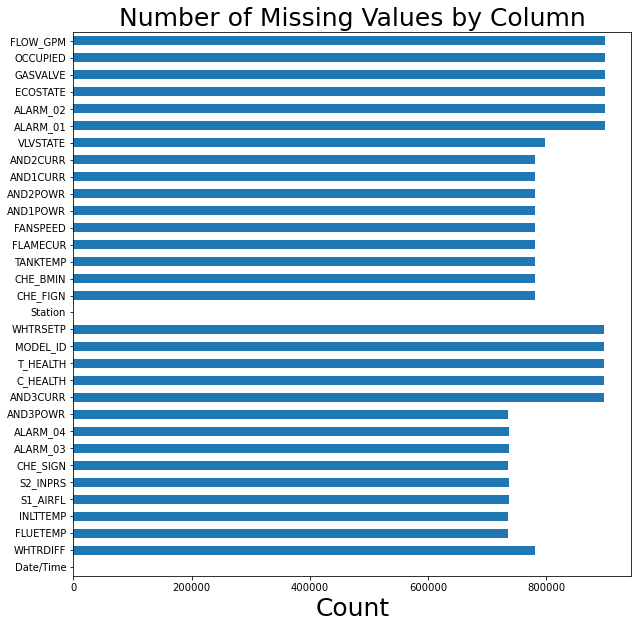

In [80]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (10,10))

df1.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

In [ ]:
df1.shape

In [ ]:
#drop missing rows
#df_data.dropna(inplace=True)

<AxesSubplot:>

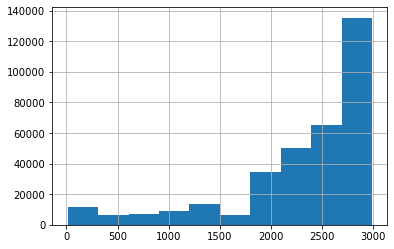

In [81]:
df1['CHE_FIGN'].hist()

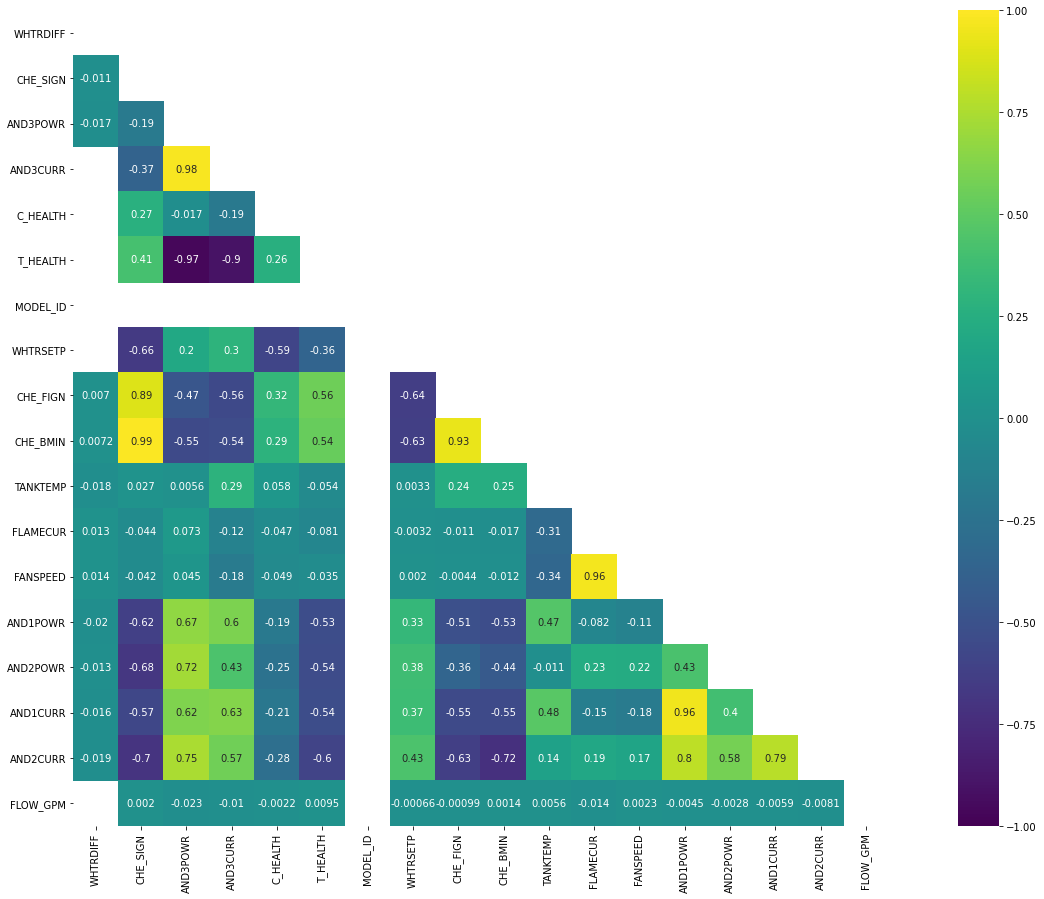

In [82]:
#visual of correlation between fields or columns
plt.figure(figsize=(25, 15))
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df1.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);

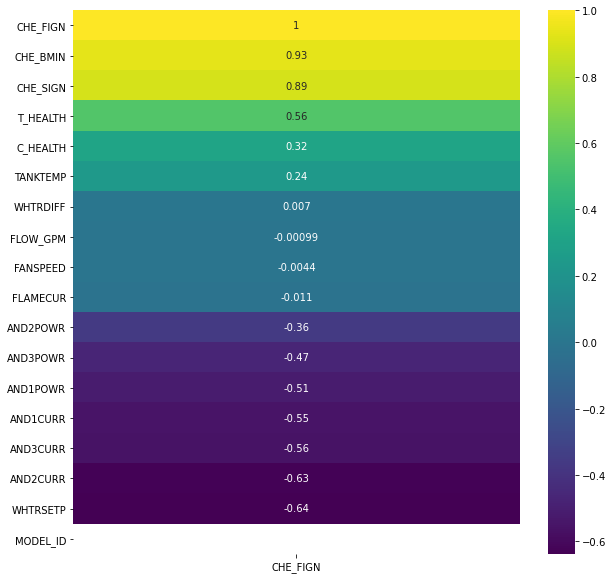

In [83]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df1.corr()[['CHE_FIGN']].sort_values('CHE_FIGN', ascending=False), annot=True, cmap='viridis');

In [84]:
#numeric data from df_data
df_numeric = df1._get_numeric_data()

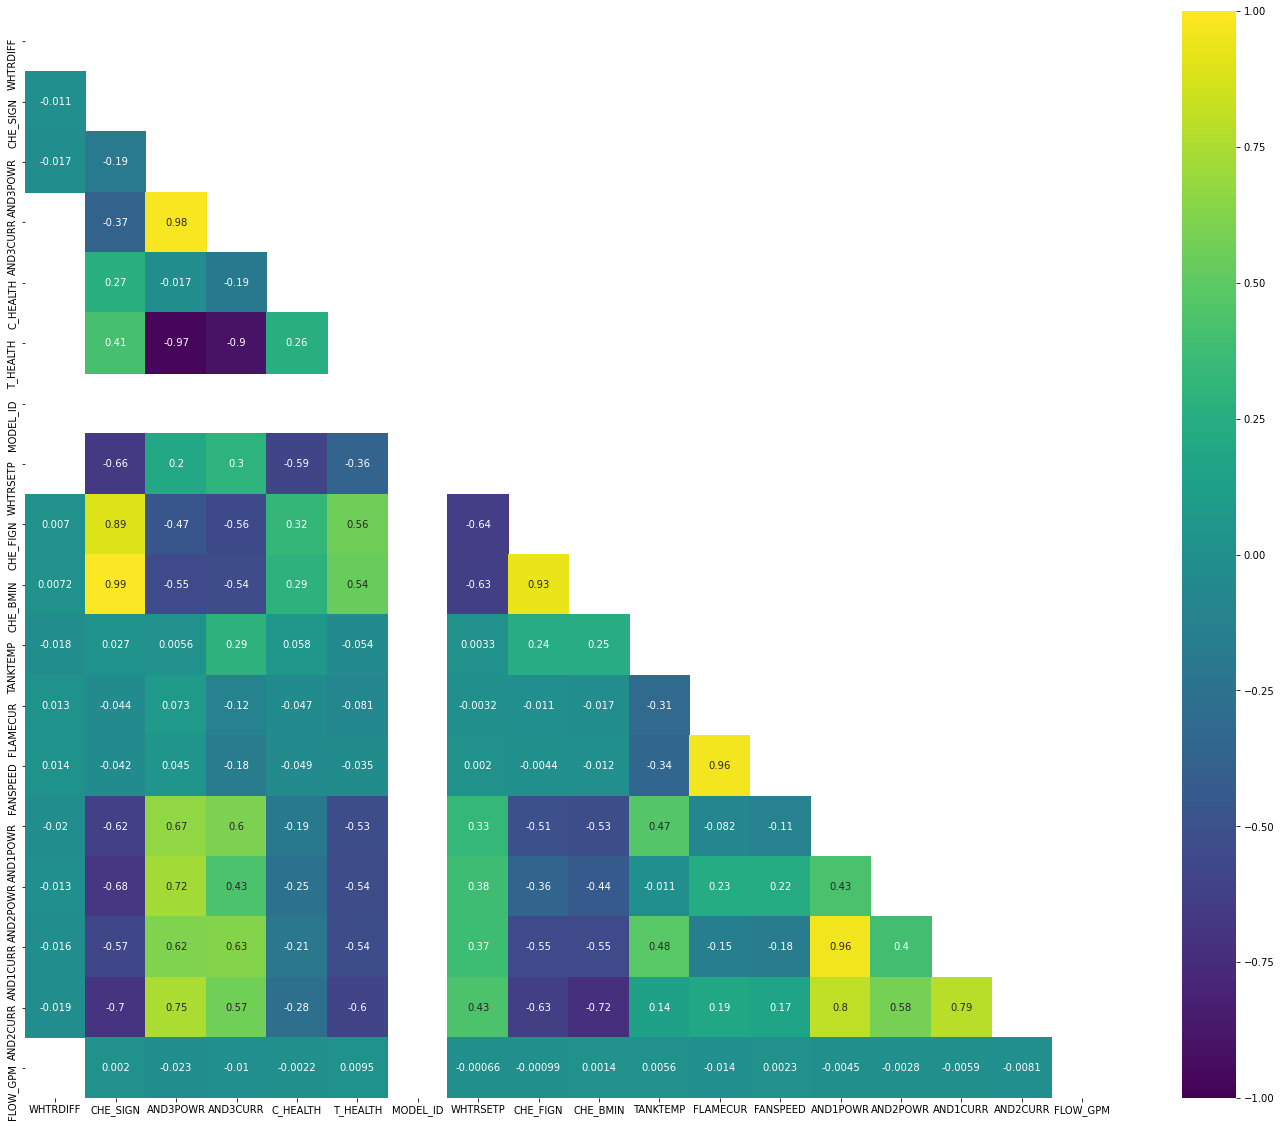

In [85]:
plt.figure(figsize=(25, 20))
mask = np.zeros_like(df_numeric.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_numeric.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);


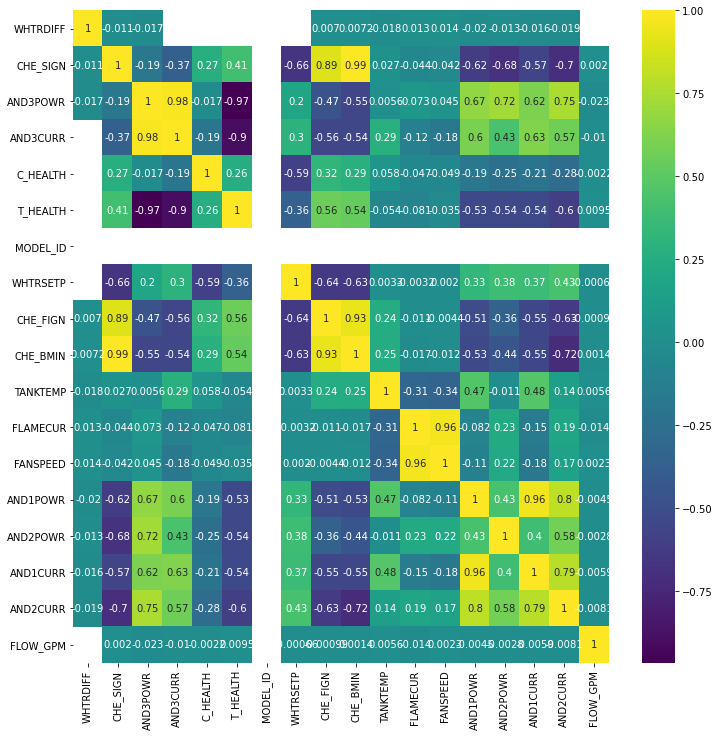

In [86]:
plt.figure(figsize=(12,12))

sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis');

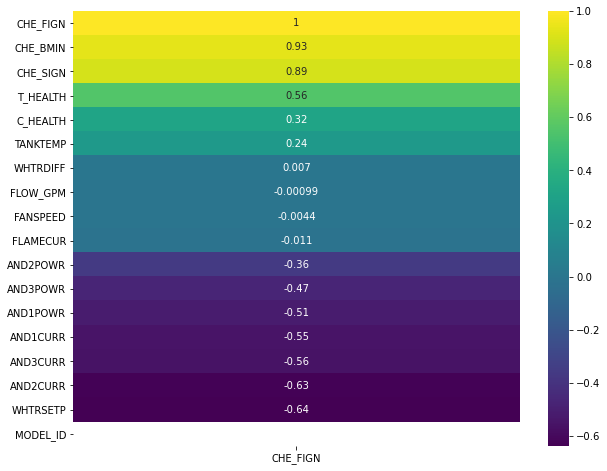

In [87]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['CHE_FIGN']].sort_values('CHE_FIGN', ascending=False), annot=True, cmap='viridis');

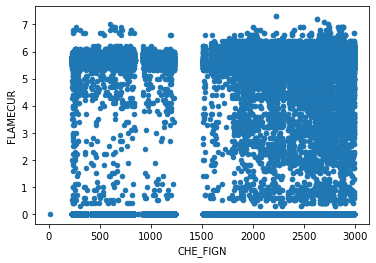

In [88]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df1.plot(kind='scatter', x = 'CHE_FIGN', y='FLAMECUR');

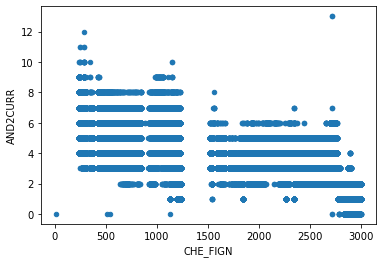

In [89]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df1.plot(kind='scatter', x = 'CHE_FIGN', y='AND2CURR');

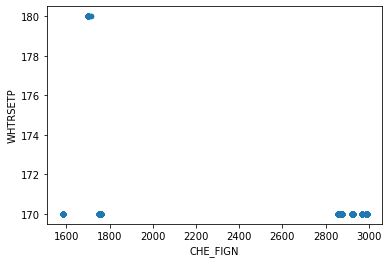

In [90]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df1.plot(kind='scatter', x = 'CHE_FIGN', y='WHTRSETP');

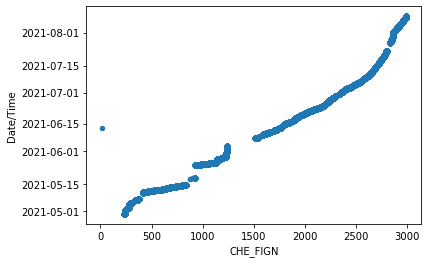

In [91]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df1.plot(kind='scatter', x = 'CHE_FIGN', y='Date/Time');

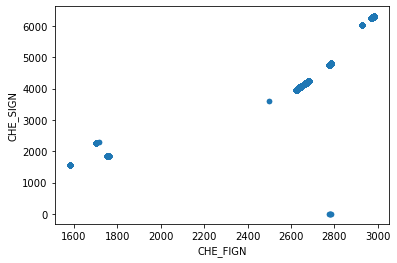

In [92]:
#Scatter plot to see relation between CHE_FIGN and CHE_SIGN
df1.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_SIGN');

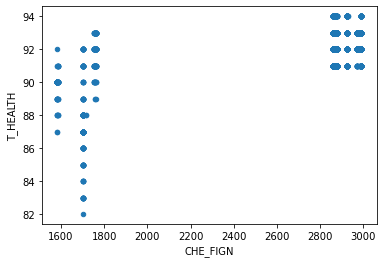

In [93]:
#Scatter plot to see relation between CHE_FIGN and T_HEALTH
df1.plot(kind='scatter', x = 'CHE_FIGN', y='T_HEALTH');

<AxesSubplot:>

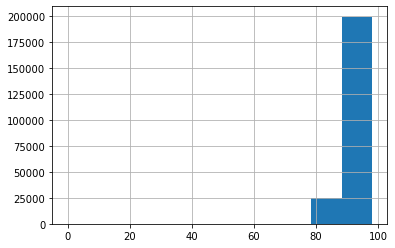

In [94]:
df1['T_HEALTH'].hist()

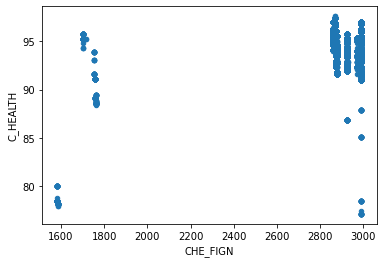

In [95]:
#Scatter plot to see relation between CHE_FIGN and C_HEALTH
df1.plot(kind='scatter', x = 'CHE_FIGN', y='C_HEALTH');

<AxesSubplot:>

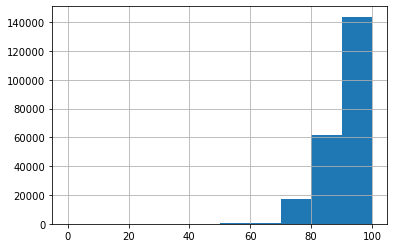

In [96]:
df1['C_HEALTH'].hist()

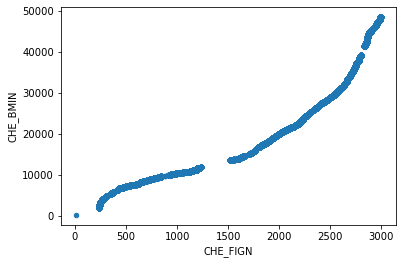

In [97]:
#Scatter plot to see relation between CHE_FIGN and CHE_BMIN
df1.plot(kind='scatter', x = 'CHE_FIGN', y='CHE_BMIN');

In [ ]:
#selct and drop any columns
# features = ['column1', 'column2']
#df1_columns = df1[features]
#df1_final = df_final['CHE_FIGN']
#df1_final = df_final.drop(columns=['CHE_FIGN', 'CHE_FIGN'])

In [ ]:
#creating dataframe df2 of "NL I10"
df2 = pd.read_csv("./clean-anes/NL I10.csv")

In [ ]:
#readong first 5 rows of "NL I10"
df2.head()

In [ ]:
# looking at null values and data types of each column for "NL I09"
df2.info()